# Production Model Insights

In this section, we will examine the results obtained from our model. The model of choice will be a linear regression without any regularisation applied as we did not observe significant improvement in R2 score or RMSE.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
coeff=pd.read_csv("../datasets/model_coefficients.csv")

In [3]:
coeff.sort_values(by="Coefficient Value", ascending=False)

,Feature,Coefficient Value,Category
66,full_flat_type_4 ROOM Terrace,469844.146815,full_flat_type
55,full_flat_type_3 ROOM Terrace,438662.733924,full_flat_type
71,full_flat_type_5 ROOM Improved-Maisonette,228385.865978,full_flat_type
77,full_flat_type_5 ROOM Type S2,219064.162161,full_flat_type
75,full_flat_type_5 ROOM Premium Apartment Loft,211134.407874,full_flat_type
...,...,...,...
24,planning_area_Jurong West,-90442.185765,planning_area
18,planning_area_Choa Chu Kang,-105278.927381,planning_area
15,planning_area_Bukit Panjang,-109099.526538,planning_area
40,planning_area_Woodlands,-134796.466479,planning_area


##  Analysis of Model Coefficients

### Overall Model

In [4]:
coeff['Coeff_abs_value']=coeff['Coefficient Value'].map(lambda x: abs(x))

In [5]:
overall_coeff=coeff.sort_values(by="Coeff_abs_value",ascending=False)[['Feature','Coefficient Value','Category']]

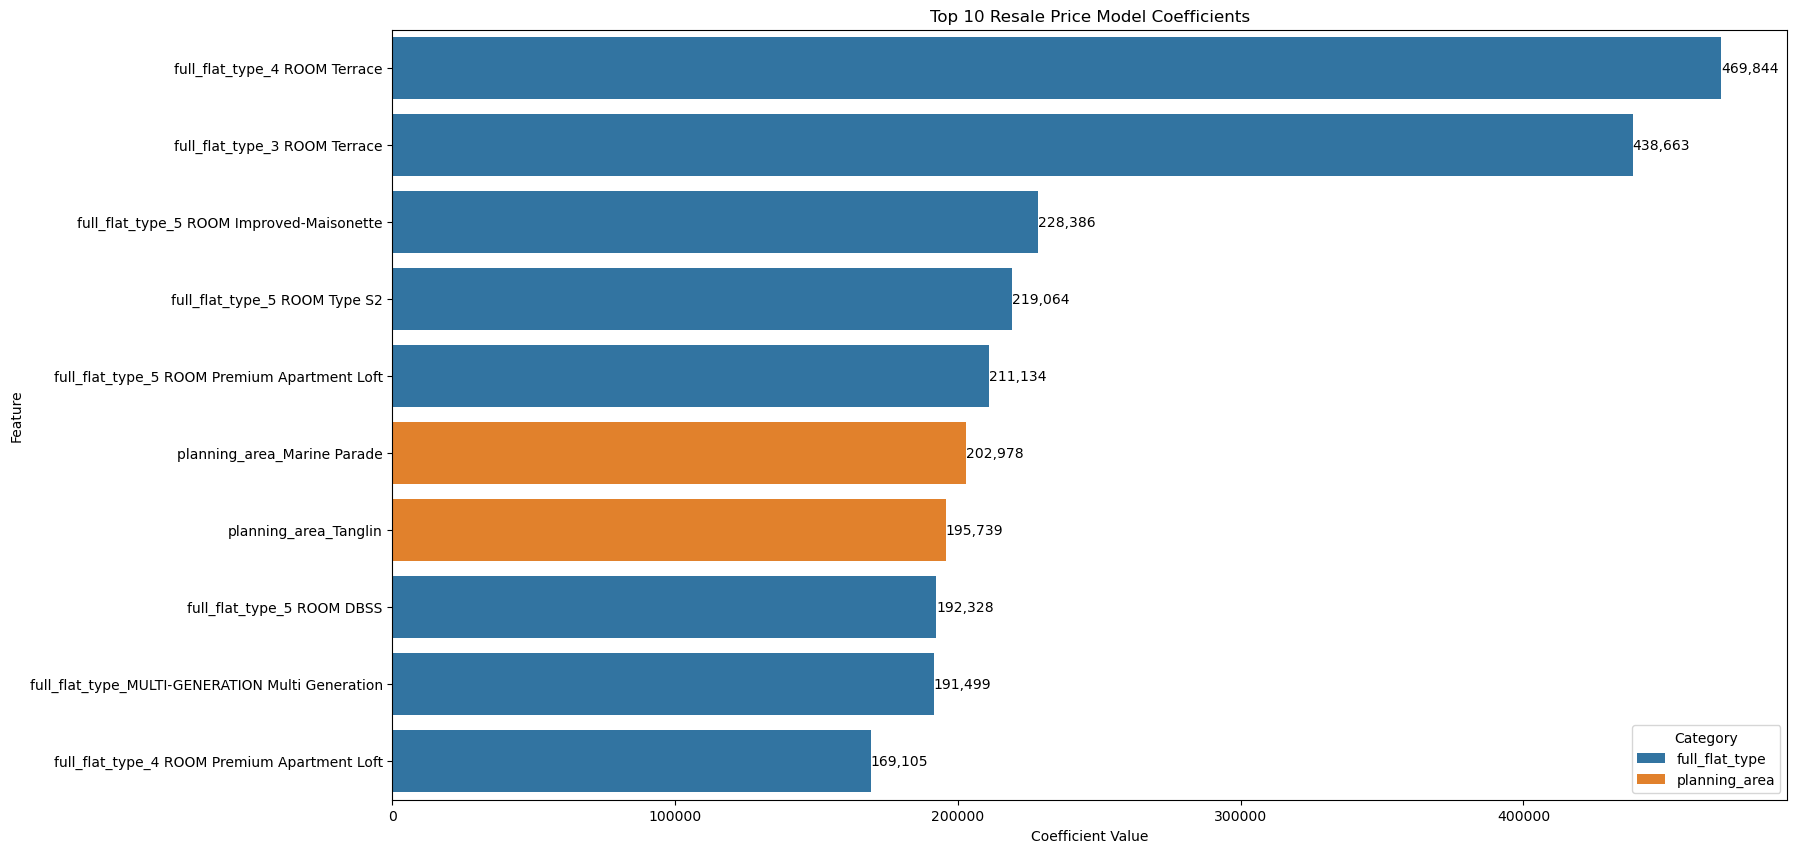

In [6]:
# bar plot of top 10 model cofficients (absolute value) and coloured by category 
fig=plt.subplots(1,1,figsize=(18,10))
overall_coeff_top10 = overall_coeff[:10]

ax = sns.barplot(overall_coeff_top10, x='Coefficient Value', y='Feature', hue='Category',dodge=False)

for category in ax.containers:
    ax.bar_label(category, labels=[f'{x:,.0f}' for x in category.datavalues]);
    
ax.set_title('Top 10 Resale Price Model Coefficients')
plt.show()

Observation:

- Among the top 10 predictor variables, 8 are related to the flat type. This suggests that flat type has the most significant impact on resale price.
- We would need to pay approximately \$470,000 more for a 4 room terrace HDB, as compared to a 1 ROOM Improved HDB (reference for full flat type).
- We would need to pay approximately \$196,000 - 203,000 more for a unit located in the planning areas of Marine Parade or Tanglin, as compared to Ang Mo Kio (reference for planning area).

### Full Flat Type

In [7]:
full_flat_type_coeff=coeff[coeff['Category']=='full_flat_type'].sort_values(by="Coeff_abs_value",
                                                                            ascending=False)[['Feature','Coefficient Value','Category']]

In [8]:
full_flat_type_coeff

,Feature,Coefficient Value,Category
66,full_flat_type_4 ROOM Terrace,469844.146815,full_flat_type
55,full_flat_type_3 ROOM Terrace,438662.733924,full_flat_type
71,full_flat_type_5 ROOM Improved-Maisonette,228385.865978,full_flat_type
77,full_flat_type_5 ROOM Type S2,219064.162161,full_flat_type
75,full_flat_type_5 ROOM Premium Apartment Loft,211134.407874,full_flat_type
69,full_flat_type_5 ROOM DBSS,192328.070815,full_flat_type
83,full_flat_type_MULTI-GENERATION Multi Generation,191499.303210,full_flat_type
63,full_flat_type_4 ROOM Premium Apartment Loft,169105.160850,full_flat_type
73,full_flat_type_5 ROOM Model A-Maisonette,165642.577140,full_flat_type
82,full_flat_type_EXECUTIVE Premium Maisonette,162809.690490,full_flat_type


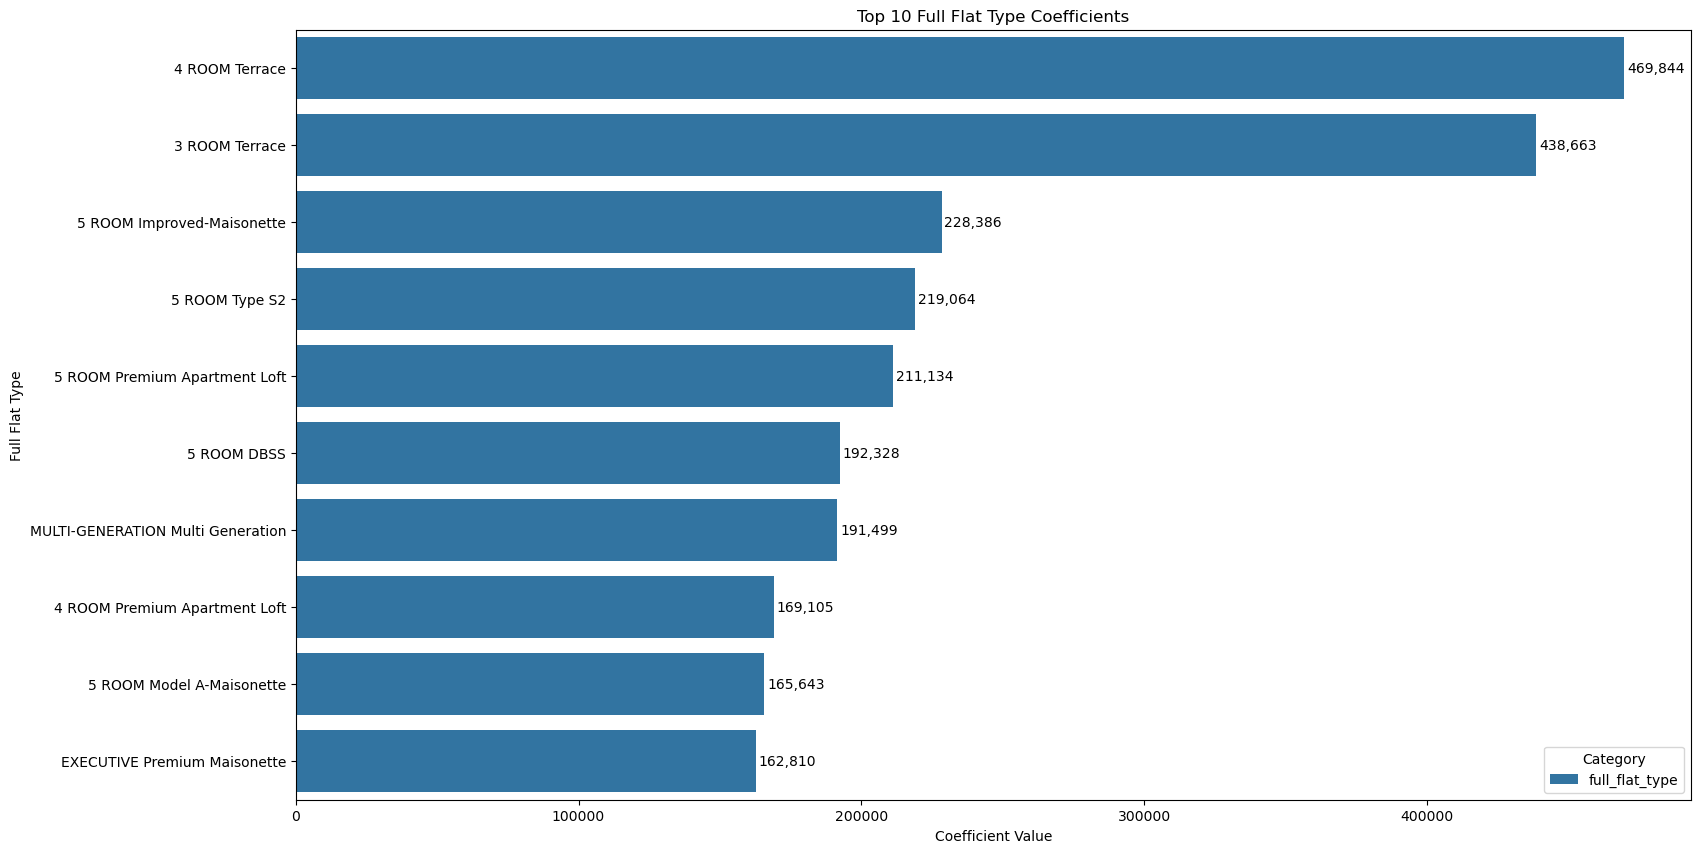

In [9]:
# bar plot of top 10 full flat type model coefficients (absolute value) and coloured by category 
fig=plt.subplots(1,1,figsize=(18,10))
full_flat_type_coeff_top10 = full_flat_type_coeff[:10]

ax = sns.barplot(full_flat_type_coeff_top10, x='Coefficient Value',y=[x[15:] for x in full_flat_type_coeff_top10.Feature],hue='Category',dodge=False)

for category in ax.containers:
    ax.bar_label(category, labels=[f'{x:,.0f}' for x in category.datavalues], padding=2);
    
ax.set_title('Top 10 Full Flat Type Coefficients')
ax.set_ylabel('Full Flat Type')
plt.show()

Observation:

- Terrace units are significantly more expensive than the others
- The only 3 room flat type that made it in the top 10 coefficients is a terrace unit
- The top 10 full flat types mostly consist of 5 room units

### Planning Area

In [10]:
planning_area_coeff=coeff[coeff['Category']=='planning_area'].sort_values(by="Coefficient Value",
                                                                            ascending=False)[['Feature','Coefficient Value','Category']]

In [11]:
planning_area_coeff

,Feature,Coefficient Value,Category
26,planning_area_Marine Parade,202978.044438,planning_area
37,planning_area_Tanglin,195739.118795,planning_area
20,planning_area_Downtown Core,163828.894945,planning_area
17,planning_area_Changi,161491.075847,planning_area
16,planning_area_Bukit Timah,155308.161928,planning_area
12,planning_area_Bishan,94979.409462,planning_area
14,planning_area_Bukit Merah,86164.385722,planning_area
31,planning_area_Queenstown,78539.725672,planning_area
28,planning_area_Outram,77855.176878,planning_area
35,planning_area_Serangoon,35113.972028,planning_area


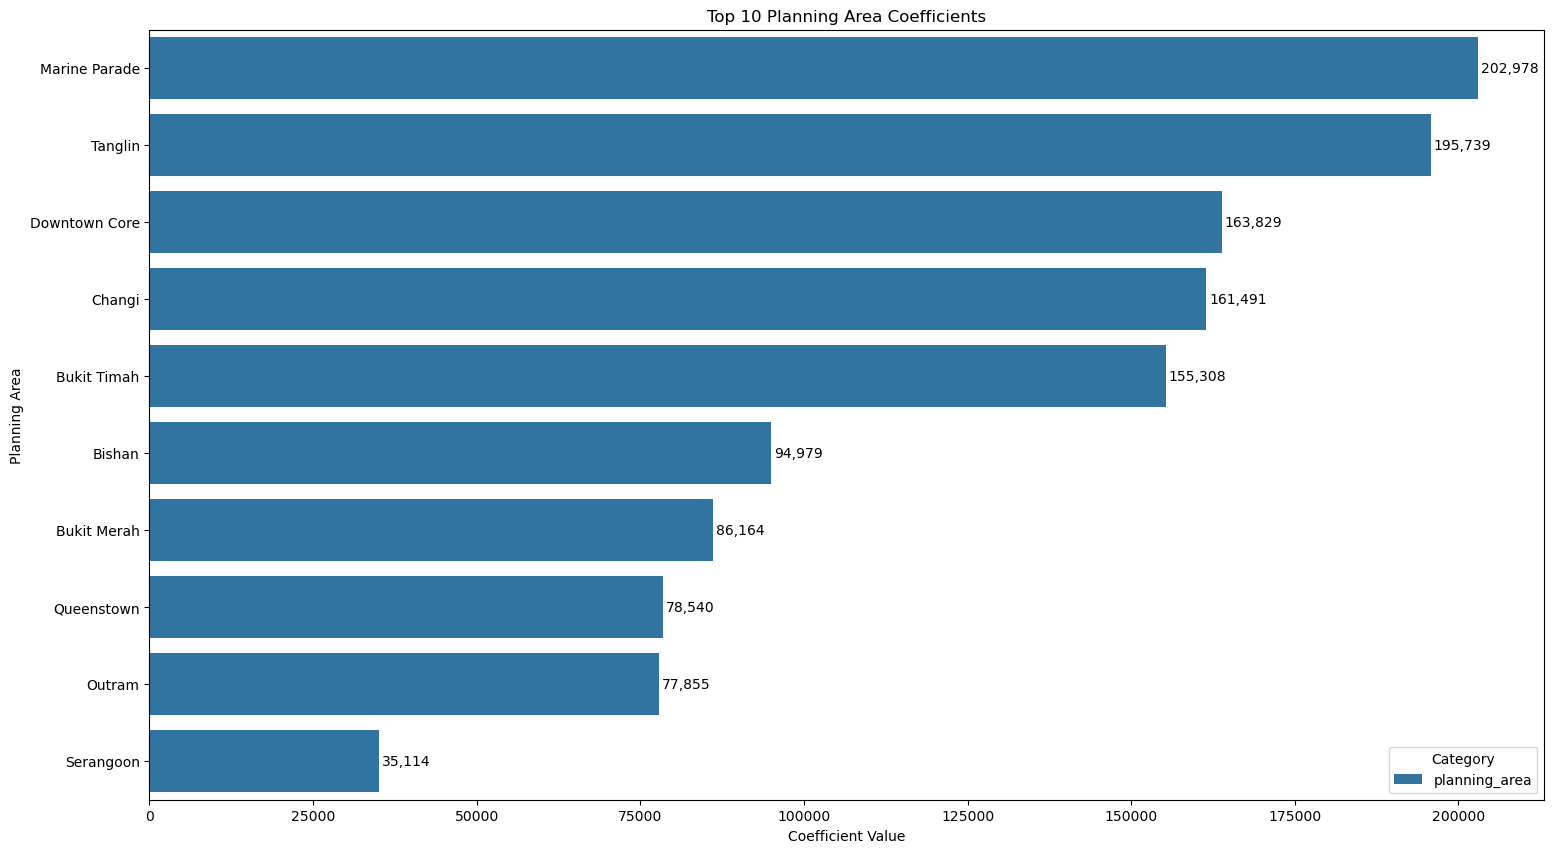

In [12]:
# bar plot of top 10 planning area coefficients (absolute value) and coloured by category 
fig=plt.subplots(1,1,figsize=(18,10))
planning_area_coeff_top10 = planning_area_coeff[:10]

ax = sns.barplot(planning_area_coeff_top10, x='Coefficient Value', y=[x[14:] for x in planning_area_coeff_top10.Feature]
                 ,hue='Category',dodge=False)

for category in ax.containers:
    ax.bar_label(category, labels=[f'{x:,.0f}' for x in category.datavalues], padding=2);
    
ax.set_title('Top 10 Planning Area Coefficients')
ax.set_ylabel('Planning Area')
plt.show()

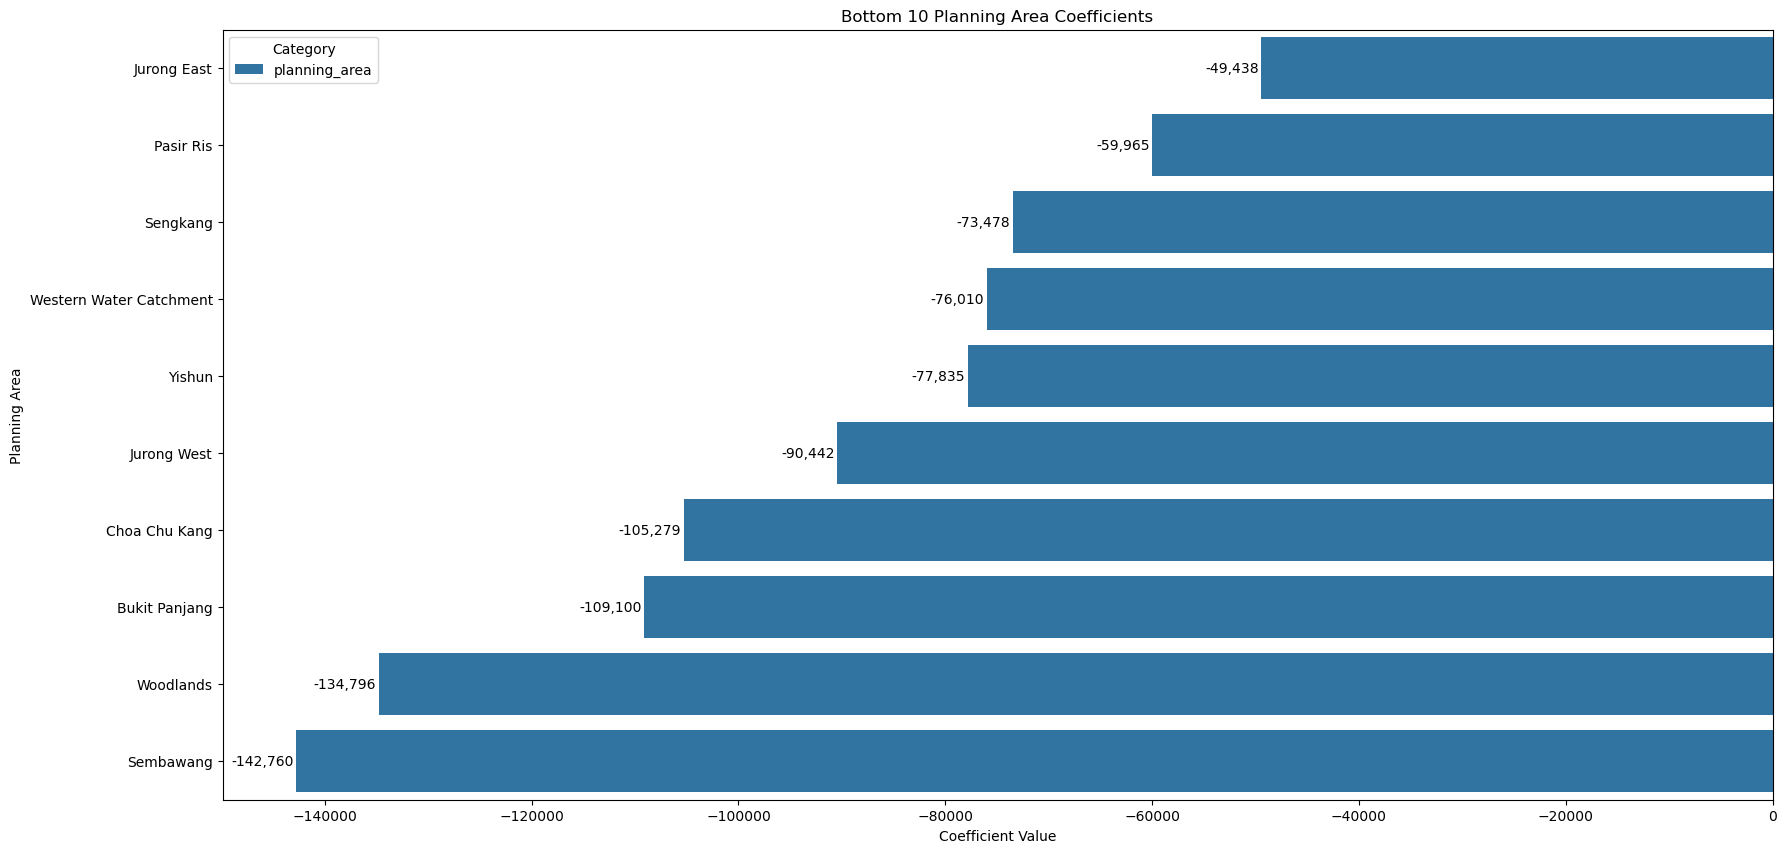

In [13]:
# bar plot of btm 10 planning area coefficients (absolute value) and coloured by category 
fig=plt.subplots(1,1,figsize=(20,10))
planning_area_coeff_btm10 = planning_area_coeff[-10:]

ax = sns.barplot(planning_area_coeff_btm10, x='Coefficient Value', y=[x[14:] for x in planning_area_coeff_btm10.Feature],hue='Category',dodge=False)

for category in ax.containers:
    ax.bar_label(category, labels=[f'{x:,.0f}' for x in category.datavalues], padding=2);
    
ax.set_title('Bottom 10 Planning Area Coefficients')
ax.set_ylabel('Planning Area')
plt.show()

Observation:
- HDBs in Marine Parade and Tanglin planning area have the greatest positive impact on resale price compared to Ang Mo Kio (approx. more than \$200k) <br>
- The next tier of locations are in Downtown Core, Changi and Bukit Timah<br>
- Other locations fetch less than \$100k price difference compared to Ang Mo Kio<br>
- At the other end, Woodlands, Sembawang, Bukit Panjang and Choa Chu Kang have a negative impact on resale price compared to Ang Mo Kio (approx. reduced at least by \$100k)

### Amenities

In [14]:
amenities_coeff = coeff[(coeff['Category'] == 'mrt/bus') | (coeff['Category'] == 'mall') | 
                        (coeff['Category'] == 'hawker') | (coeff['Category'] == 'sch')].sort_values(by='Coefficient Value',ascending=False)

In [15]:
amenities_coeff

,Feature,Coefficient Value,Category,Coeff_abs_value
8,bus_interchange,6904.620000,mrt/bus,6904.620000
9,mrt_interchange,4099.516159,mrt/bus,4099.516159
4,pri_sch_nearest_distance,10.590783,sch,10.590783
5,sec_sch_nearest_dist,9.706294,sch,9.706294
10,mall_nearest_distance,-16.224159,mall,16.224159
6,hawker_nearest_distance,-18.105285,hawker,18.105285
7,mrt_nearest_distance,-58.259048,mrt/bus,58.259048


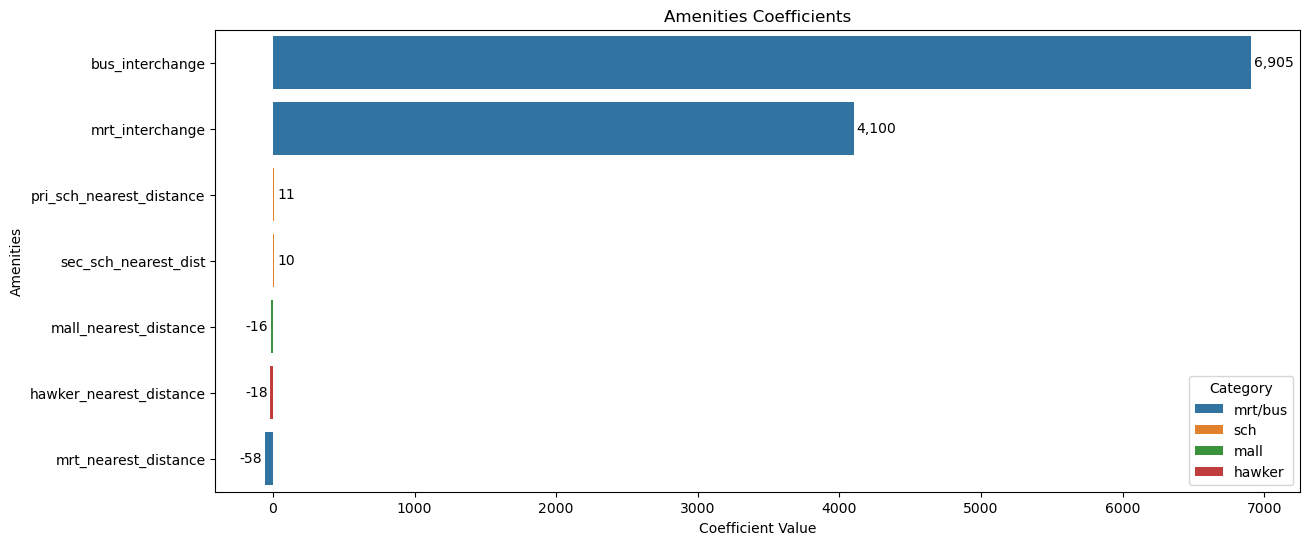

In [16]:
# bar plot of amenities coefficients (absolute value) and coloured by category 
fig=plt.subplots(1,1,figsize=(14,6))

ax = sns.barplot(amenities_coeff,x='Coefficient Value',y='Feature',hue='Category',dodge=False)
           
for category in ax.containers:
    ax.bar_label(category, labels=[f'{x:,.0f}' for x in category.datavalues], padding=2);
    
ax.set_title('Amenities Coefficients');
ax.set_ylabel('Amenities')
plt.show()

Observation:
- Distance from housing unit to amenities appears to be negligible effect on resale price, however the effect could be significant if the distance is a considerable one. (eg. additional 1000m from house to the nearest mall reduces resale price by $16,000)
- The presence of a bus interchange increases resale price by \$6.9k
- The presence of an MRT interchange increase resale price by \$4.1k


### Others

In [17]:
other_coeff = coeff[(coeff['Category'] == 'floor_area_sqft') | (coeff['Category'] == 'hdb_age') 
                    | (coeff['Category'] == 'storey') | (coeff['Category'] == 'var')].sort_values(by='Coefficient Value',ascending=False)

In [19]:
other_coeff

,Feature,Coefficient Value,Category,Coeff_abs_value
1,mid,3358.043011,storey,3358.043011
2,max_floor_lvl,2798.384944,storey,2798.384944
3,floor_area_sqft,308.446031,floor_area_sqft,308.446031
0,hdb_age,-3437.181384,hdb_age,3437.181384


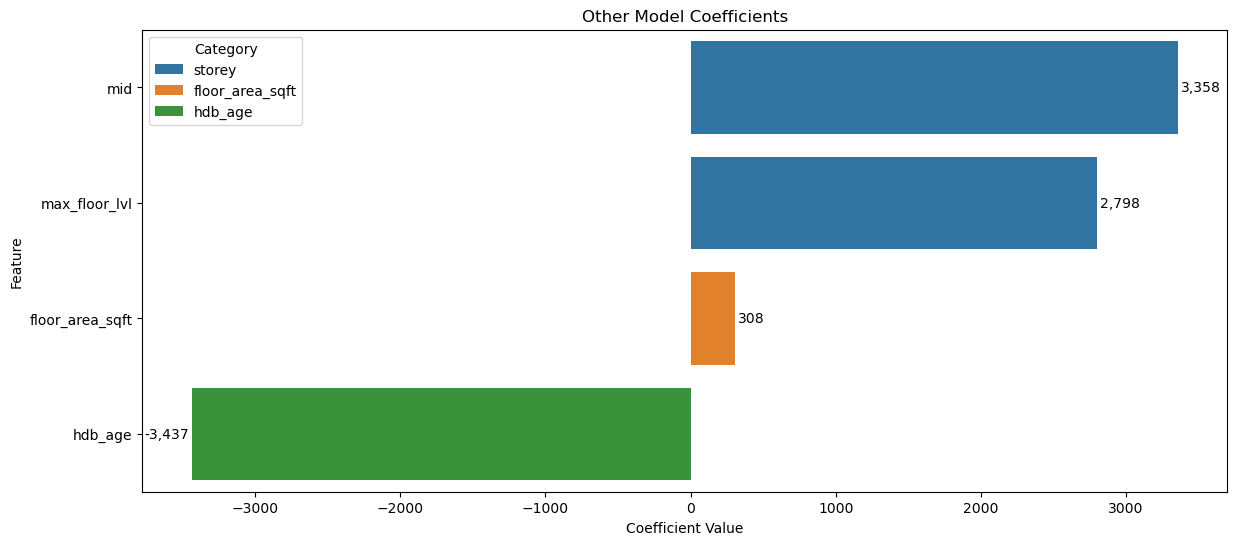

In [20]:
# bar plot of other variables related variables by coefficient and coloured by category 
# (whether absolute value is taken is not important since the smallest negative coefficient is -0.2)
#model_coef_others = model_coef[(model_coef['category'] == 'floor_area_sqft') | (model_coef['category'] == 'hdb_age') | (model_coef['category'] == 'storey')]
fig=plt.subplots(1,1,figsize=(14,6))
ax = sns.barplot(other_coeff,x='Coefficient Value',y='Feature',hue='Category',dodge=False)
for category in ax.containers:
    ax.bar_label(category, labels=[f'{x:,.0f}' for x in category.datavalues], padding=2);
ax.set_title('Other Model Coefficients');


Observation:

- For every unit increase in storey of a flat, resale price will increase by \$3.4k
- For every unit increase in maximum floor level of a flat, resale price will inccrease by \$2.8k
- For every sqft increase in the size of a flat, resale price will increase by \$308
- For every year increase in the age of a flat, resale price will decrease by \$3.4k

### Conclusion & Recommendations

Planning area and flat type are the most influential factors that determine a housing unit's resale price. A HDB in Marine Parade or Tanglin can expect to sell at a higher resale price than other areas, while those in Woodlands and Sembawang are expected to sell for the lowest prices. With the exception of terrace units, resale price will likely be dependent on the number of rooms in the units. The more rooms there are, the higher the resale price. Amenities have a much lower impact on resale price.

### Future Research

Besides the HDB resale market, it would be worth taking a look into the private property market in Singapore as well. Looking at both HDB and private markets might help to  create interesting insights and allow us to compare features that drive housing prices in both markets. In addition, studying overseas housing trends might also allow us to understand features that are specific to different countries/continents.

This resale price model is specific to Singapore and may not be representative of other cities. For instance, our neighbouring countries have significantly more land and floor area might not be an immediate concern anymore. In addition, some other features could be added to the dataset. One example would be increase the amount of facilities/amenities, such as the distance to provision shops, fast food chains or coffeeshops instead of relying on just distance to hawker centres.